<a href="https://colab.research.google.com/github/fateme-alk/learning/blob/main/Simple_Linear_Regression_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 style="text-align:center">
    <a href="https://www.coursera.org/learn/machine-learning-with-python/home/welcome" target="_blank">
    Machine Learning with Python - IBM
    </a>
</h1>

<p  style="text-align:center">Module 2 - Lab 1</p>

<p>
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


# Simple Linear Regression

Estimated time needed: **15** minutes
    

## Objectives

After completing this lab, you will be able to:

* Use scikit-learn to implement simple linear regression
* Create, train, and test a linear regression model on real data


### Import needed packages


For this lab, you will need to have the following packages:
 - NumPy
 - Matplotlib
 - Pandas
 - Scikit-learn

To avoid issues importing these libraries, you may execute the following cell to ensure they are available.


Now, you can import these libraries.


In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

from sklearn.model_selection import train_test_split

## Load the data
The dataset you will use resides at the following URL. You can use the URL directly with the Pandas library to load the dataset.


In [2]:
url= "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv"

In [3]:
df=pd.read_csv(url)

In [4]:
df

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1062,2014,VOLVO,XC60 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1063,2014,VOLVO,XC60 AWD,SUV - SMALL,3.2,6,AS6,X,13.2,9.5,11.5,25,264
1064,2014,VOLVO,XC70 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1065,2014,VOLVO,XC70 AWD,SUV - SMALL,3.2,6,AS6,X,12.9,9.3,11.3,25,260


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   int64  
 1   MAKE                      1067 non-null   object 
 2   MODEL                     1067 non-null   object 
 3   VEHICLECLASS              1067 non-null   object 
 4   ENGINESIZE                1067 non-null   float64
 5   CYLINDERS                 1067 non-null   int64  
 6   TRANSMISSION              1067 non-null   object 
 7   FUELTYPE                  1067 non-null   object 
 8   FUELCONSUMPTION_CITY      1067 non-null   float64
 9   FUELCONSUMPTION_HWY       1067 non-null   float64
 10  FUELCONSUMPTION_COMB      1067 non-null   float64
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 12  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 108.5+ KB


In [6]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000



## Understand the data

### `FuelConsumption.csv`:
You will use a fuel consumption dataset, **`FuelConsumption.csv`**, which contains model-specific fuel consumption ratings and estimated carbon dioxide emissions for new light-duty vehicles for retail sale in Canada. [Dataset source](http://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64).

- **MODEL YEAR** e.g. 2014
- **MAKE** e.g. VOLVO
- **MODEL** e.g. S60 AWD
- **VEHICLE CLASS** e.g. COMPACT
- **ENGINE SIZE** e.g. 3.0
- **CYLINDERS** e.g 6
- **TRANSMISSION** e.g. AS6
- **FUEL TYPE** e.g. Z
- **FUEL CONSUMPTION in CITY(L/100 km)** e.g. 13.2
- **FUEL CONSUMPTION in HWY (L/100 km)** e.g. 9.5
- **FUEL CONSUMPTION COMBINED (L/100 km)** e.g. 11.5
- **FUEL CONSUMPTION COMBINED MPG (MPG)** e.g. 25
- **CO2 EMISSIONS (g/km)** e.g. 182

Your task will be to create a simple linear regression model from one of these features to predict CO2 emissions of unobserved cars based on that feature.


### Explore the data
First, consider a statistical summary of the data.


You can see from the statistics here that 75% of the cars have a combined fuel consumption falling within a range of up to almost three times that of the most efficient car, with respective values of 31 MPG and 11 MPG.

The highest fuel consumer at 60 MPG is suspiciously high but could be legitimate.

MODELYEAR has 0 standard deviation, and thus has no interesting information content.

FUEL CONSUMPTION COMBINED (L/100 km) and FUEL CONSUMPTION COMBINED MPG (MPG) are equal features.

In [7]:
df['MODELYEAR'].value_counts()

,count
MODELYEAR,
2014,1067


In [8]:
df['MODELYEAR'].unique()

array([2014])

#### Select features
Select a few features that might be indicative of CO2 emission to explore more.


In [9]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.sample(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
714,2.5,4,9.8,225
445,5.3,8,16.5,380
691,4.7,8,15.3,352
832,3.7,6,11.0,253
603,2.0,4,8.4,193
96,3.0,6,9.9,228
233,2.0,4,9.9,228
487,2.0,4,4.8,110
749,4.7,8,11.4,262


#### Visualize features
Consider the histograms for each of these features.


In [46]:
def draw_plot(df, feature, target):
  plt.figure(figsize=(18, 10), frameon=False)
  plt.suptitle(feature)

  plt.subplot(2, 2, 1)
  sns.histplot(df, x=feature)

  plt.subplot(2, 2, 2)
  sns.boxplot(df, x=feature)

  plt.subplot(2, 2, 3)
  sns.scatterplot(df, x=feature, y=target)

  plt.subplot(2, 2, 4)
  sns.kdeplot(df, x=feature)

In [47]:
def calculate_boxplot_stats(df, feature):
  q1 = df[feature].quantile(0.25)
  q2 = df[feature].quantile(0.5)
  q3 = df[feature].quantile(0.75)

  iqr = q3 - q1

  upper_extreme = q3 + (1.5 * iqr)
  lower_extreme = q1 - (1.5 * iqr)

  return {
    "Q1": q1,
    "Q2": q2,
    "Q3": q3,
    "IQR": iqr,
    "Lower_Extreme": lower_extreme,
    "Upper_Extreme": upper_extreme
  }

def remove_outliers(df, feature):
  stats = calculate_boxplot_stats(df, feature)
  print(stats['Upper_Extreme'])
  return df[(df[feature] > stats['Lower_Extreme']) & (df[feature] < stats['Upper_Extreme'])]

In [48]:
def remove_outliers(df, feature):
  stats = calculate_boxplot_stats(df, feature)

  return df[(df[feature] > stats['Lower_Extreme']) & (df[feature] < stats['Upper_Extreme'])]

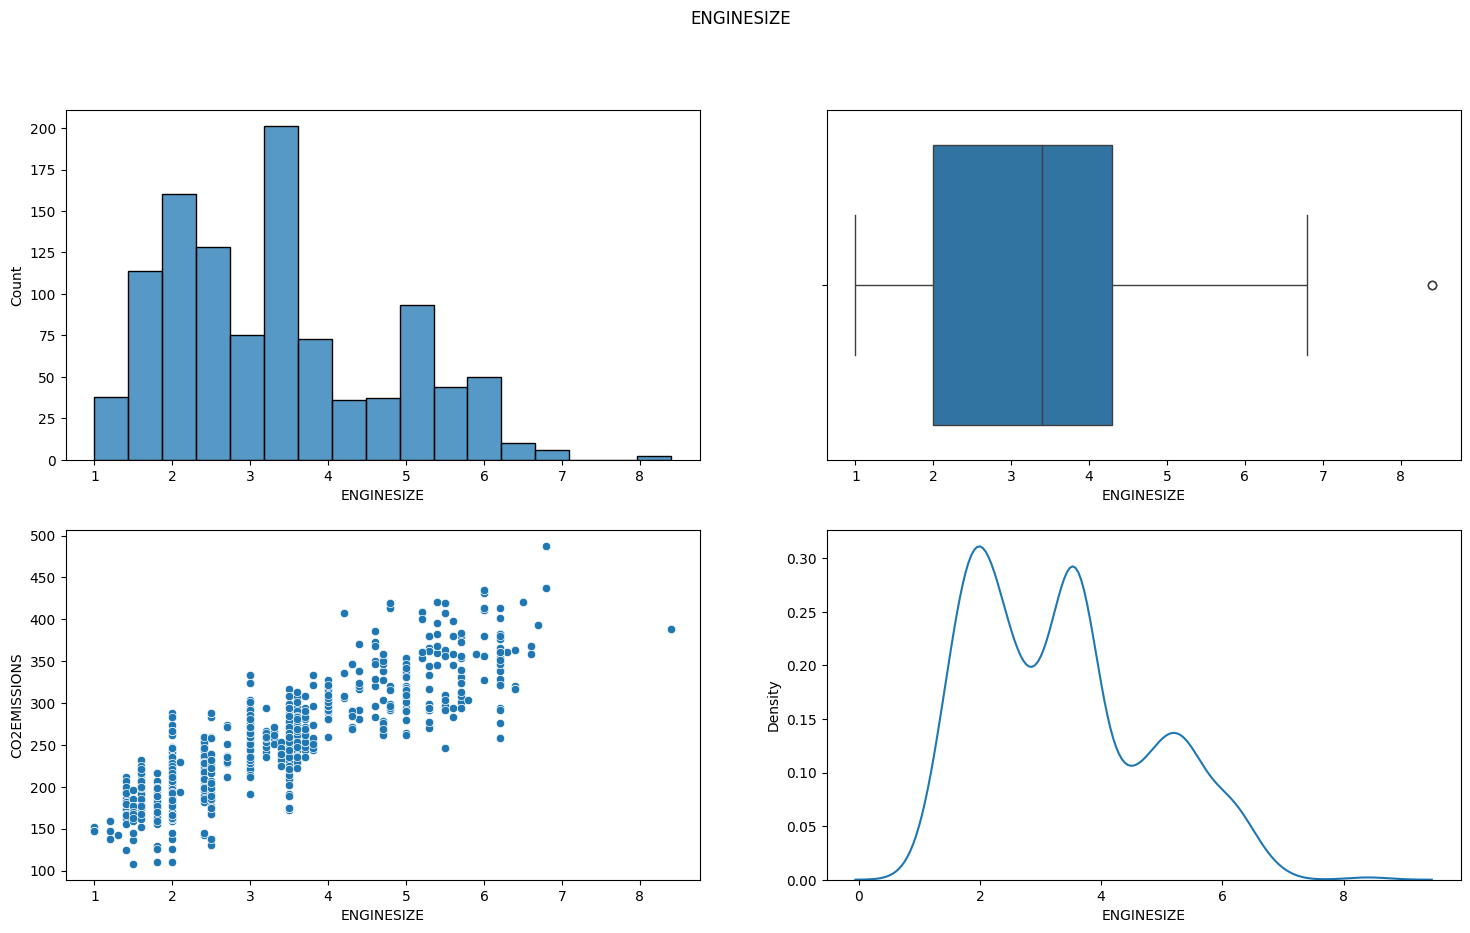

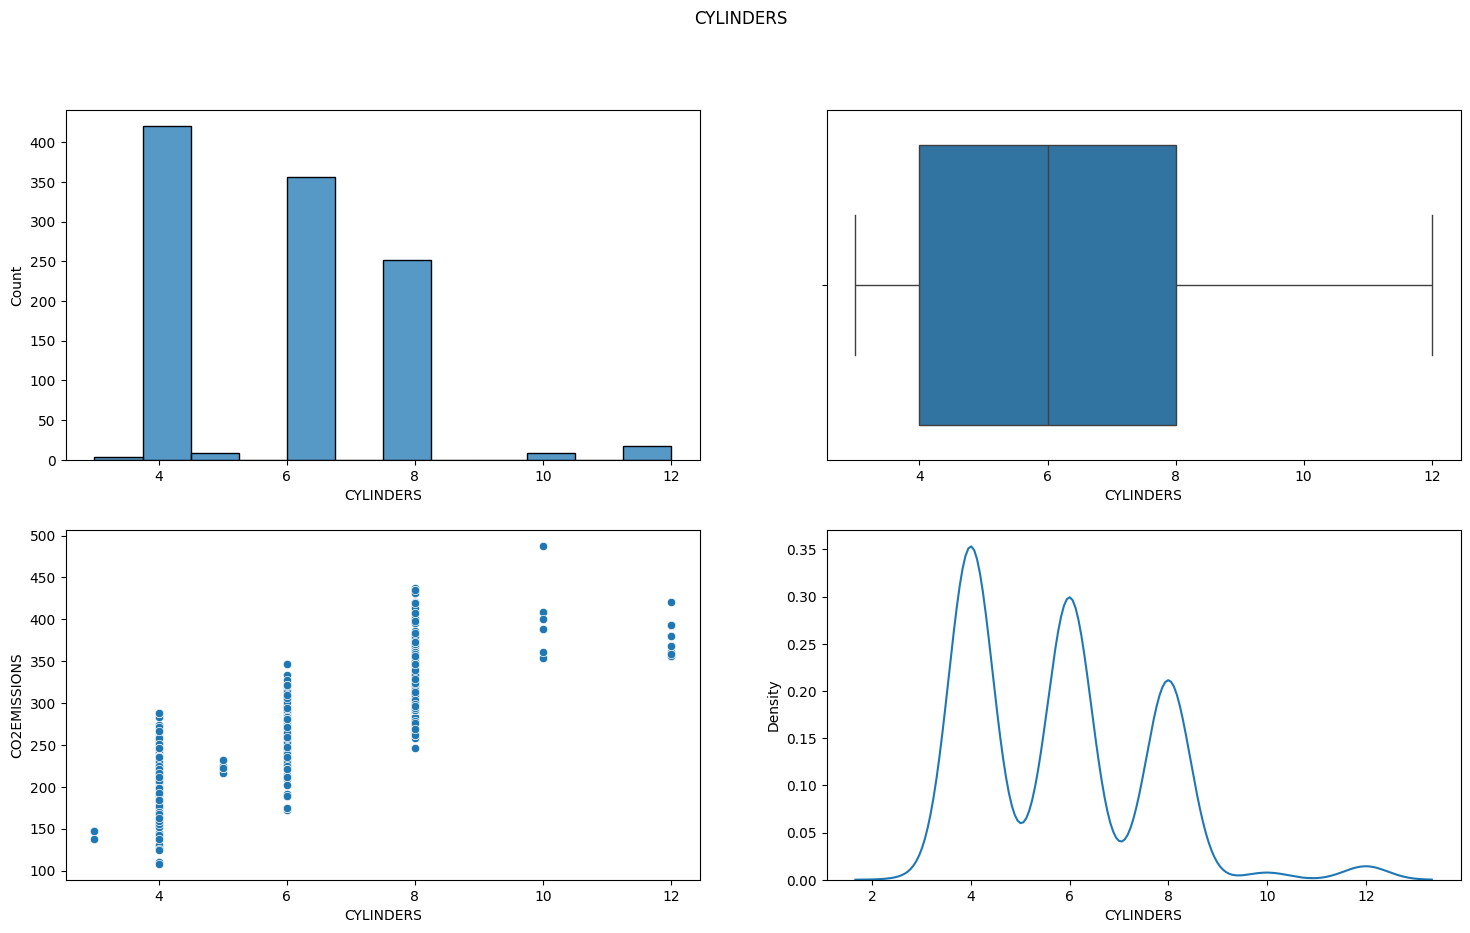

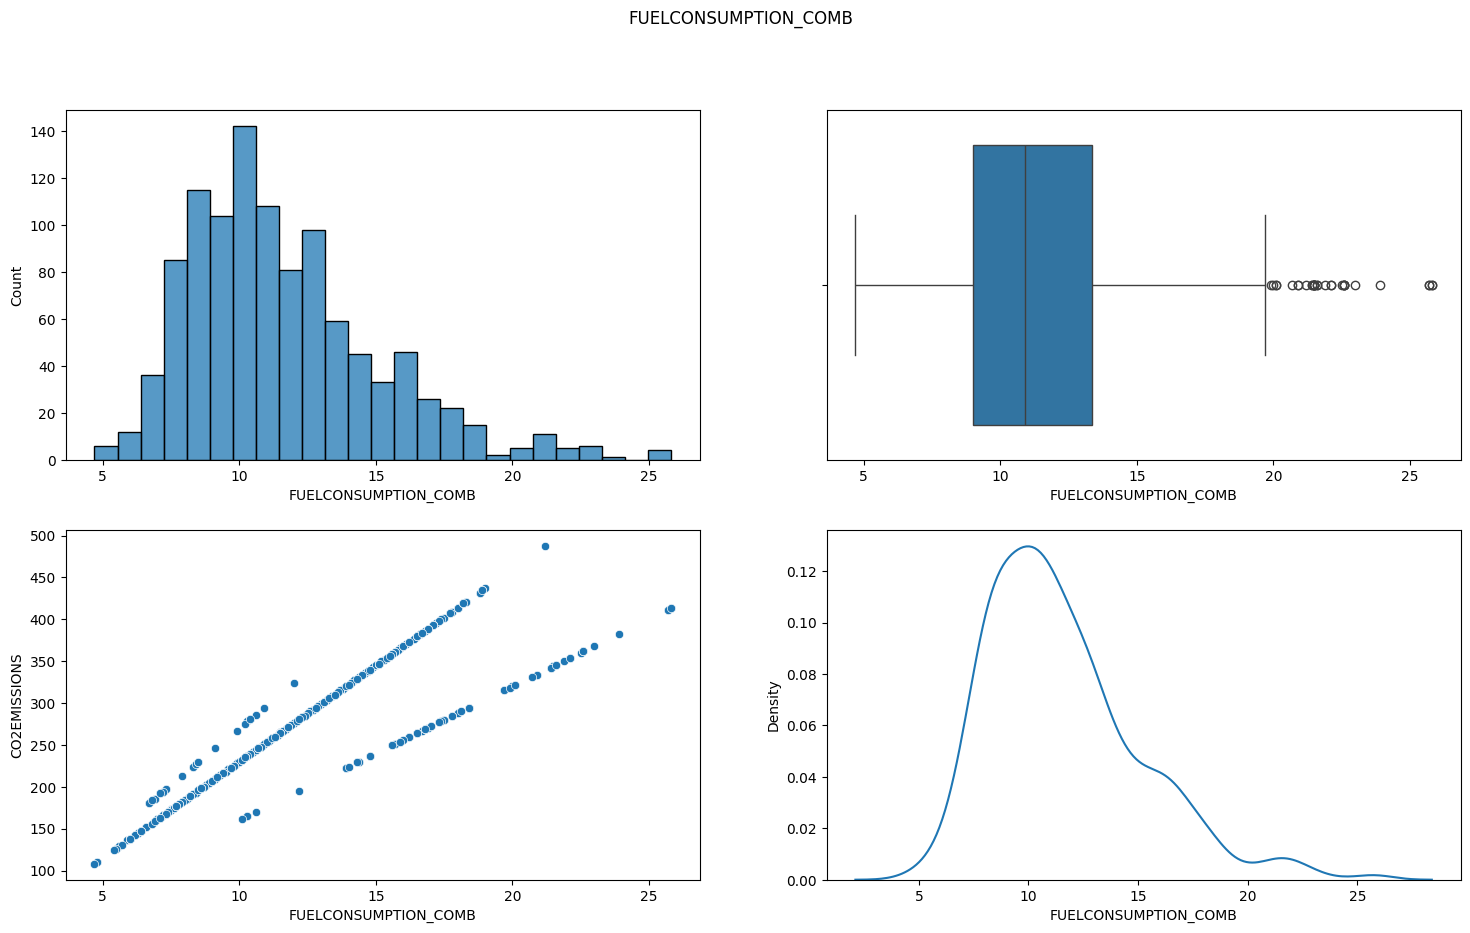

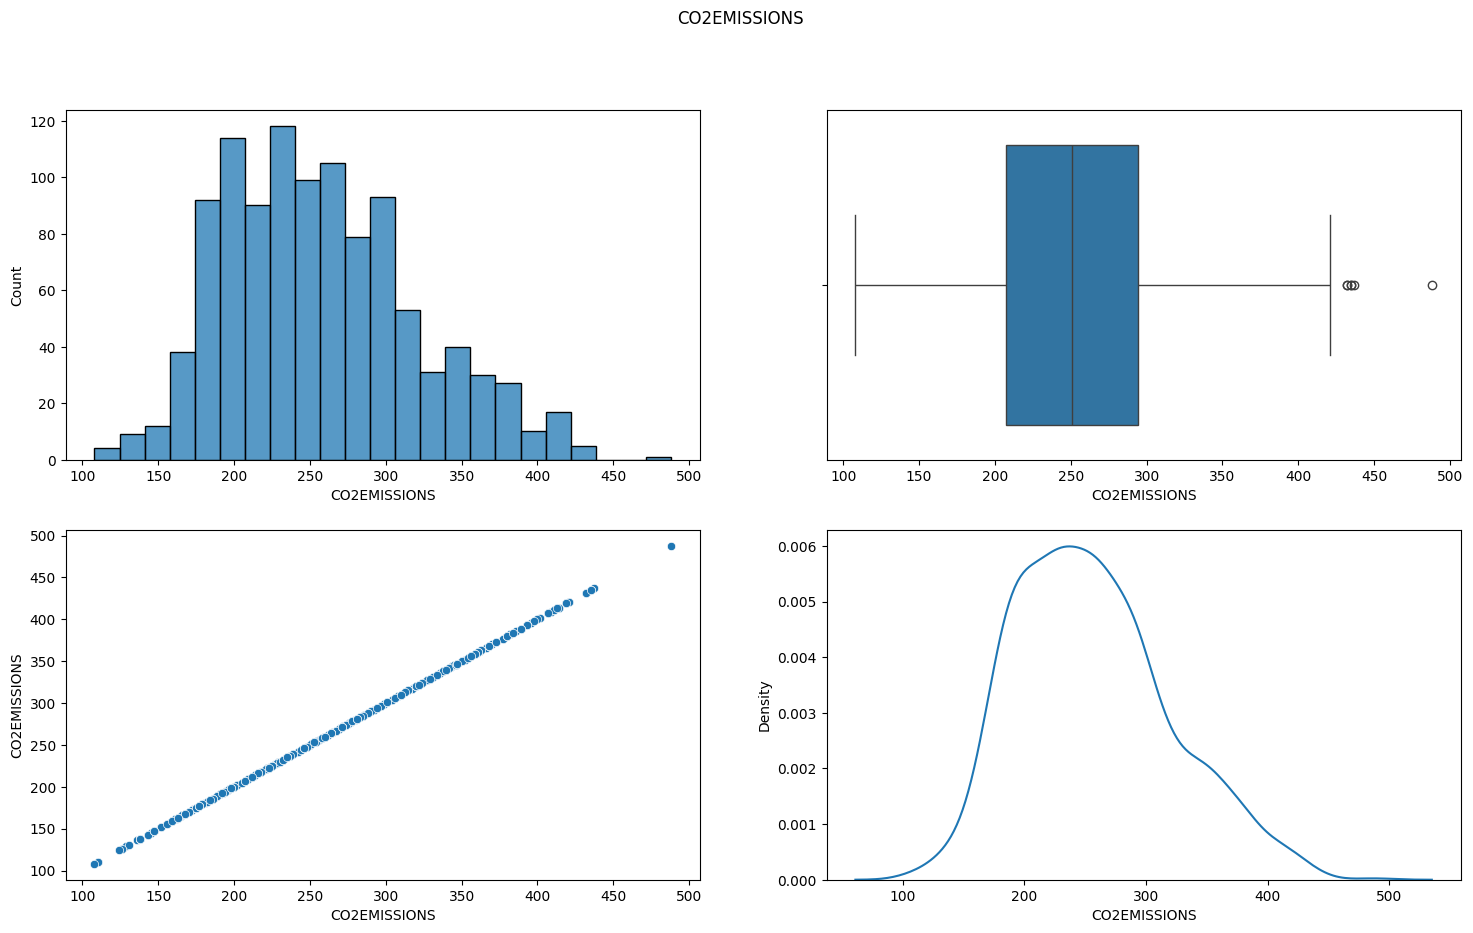

In [49]:
for feature in cdf.columns:
  draw_plot(cdf, feature, 'CO2EMISSIONS')

In [50]:
clean_cdf = remove_outliers(cdf, 'FUELCONSUMPTION_COMB')
print(clean_cdf)

      ENGINESIZE  CYLINDERS  FUELCONSUMPTION_COMB  CO2EMISSIONS
0            2.0          4                   8.5           196
1            2.4          4                   9.6           221
2            1.5          4                   5.9           136
3            3.5          6                  11.1           255
4            3.5          6                  10.6           244
...          ...        ...                   ...           ...
1062         3.0          6                  11.8           271
1063         3.2          6                  11.5           264
1064         3.0          6                  11.8           271
1065         3.2          6                  11.3           260
1066         3.2          6                  12.8           294

[1035 rows x 4 columns]


In [18]:
clean_cdf.describe()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
count,1035.000000,1035.000000,1035.000000,1035.000000
mean,3.280676,5.724638,11.255169,253.065700
std,1.383955,1.778477,2.983669,61.390682
min,1.000000,3.000000,4.700000,108.000000
25%,2.000000,4.000000,9.000000,207.000000
50%,3.200000,6.000000,10.800000,246.000000
75%,4.000000,6.000000,13.000000,292.000000
max,8.400000,12.000000,19.700000,437.000000


remove_outliers() removes rows based on the fences (extremes) calculated from the original data.

After filtering, you’re left with a “cleaned” dataset.

But when you plot a new boxplot on that cleaned dataset, the quartiles (Q1, Q3) and IQR are recalculated.

These new values may produce new fences, and relative to those, some points in the cleaned dataset can again appear as outliers.

In [20]:
aaa

NameError: name 'aaaq' is not defined

As you can see, most engines have 4, 6, or 8 cylinders, and engine sizes between 2 and 4 liters.  
As you might expect, combined fuel consumption and CO2 emission have very similar distributions.  
Go ahead and display some scatter plots of these features against the CO2 emissions, to see how linear their relationships are.


In [ ]:
plt.scatter(cdf.FUELCONSUMPTION_COMB_L, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("FUELCONSUMPTION_COMB_L")
plt.ylabel("Emission")
plt.show()

In [ ]:
df.columns

In [ ]:
df.describe(include='all')

In [ ]:
#The easiest way to see which feature creates the separation is to plot the same scatter, but color by another variable
for feature in df.columns:
  plt.figure(figsize=(22, 18))
  sns.scatterplot(df, x='FUELCONSUMPTION_COMB_L', y='CO2EMISSIONS', hue=feature, color='blue')

In [ ]:
sns.histplot(df, x='CO2EMISSIONS', hue='FUELTYPE')

This is an informative result. Three car groups each have a strong linear relationship between their combined fuel consumption and their CO2 emissions.
Their intercepts are similar, while they noticeably differ in their slopes.


In [ ]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS, color='blue')
plt.xlabel("ENGINESIZE")
plt.ylabel("Emission")
plt.xlim(0,27)
plt.show()

In [ ]:
sns.kdeplot(cdf, x='ENGINESIZE')
sns.histplot(data=cdf, x="ENGINESIZE", color="skyblue", stat="density")

plt.xlim(-1, 10)


In [ ]:
# sns.histplot(cdf["ENGINESIZE"], color="skyblue", stat="density", kde=True)
sns.histplot(data=cdf, x="ENGINESIZE", color="skyblue", stat="density", kde=True)

plt.xlim(-1, 10)

In [ ]:
sns.histplot(data=cdf, x="ENGINESIZE", color="skyblue", stat="count")
# show the number of observations in each bin, the default value of stat is 'count'

plt.xlim(-1, 10)

In [ ]:
 cdf['ENGINESIZE'].max()

Although the relationship between engine size and CO2 emission is quite linear, you can see that their correlation is weaker than that for each of the three fuel consumption groups. Notice that the x-axis range has been expanded to make the two plots more comparable.


#### Practice excercise 1
Plot __CYLINDER__ against CO2 Emission, to see how linear their relationship is.


In [ ]:
sns.scatterplot(cdf, x='CYLINDERS', y='CO2EMISSIONS')

<details><summary>Click here for the solution</summary>

```python    
plt.scatter(cdf.CYLINDERS, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("CYLINDERS")
plt.ylabel("CO2 Emission")
plt.show()

```

</details>


### Extract the input feature and labels from the dataset
Although perhaps not necessarily the ideal choice of input feature, for illustration purposes, you will use engine size to predict CO2 emission with a linear regression model.  
You can begin the process by extracting the input feature and target output variables, X and y, from the dataset.


In [ ]:
X = cdf.ENGINESIZE.to_numpy()

In [ ]:
type(X)

In [ ]:
X.shape

In [ ]:
X = cdf.ENGINESIZE.to_numpy()
y = cdf.CO2EMISSIONS.to_numpy()

In [ ]:
z = cdf.ENGINESIZE

In [ ]:
type(z)

#### Create train and test datasets
Next, you will split the dataset into mutually exclusive training and testing sets. You will train a simple linear regression model on the training set and estimate its ability to generalize to unseen data by using it to make predictions on the unseen testing data.

Since the outcome of each data point is part of the testing data, you have a means of evaluating the out-of-sample accuracy of your model.

Now, you want to randomly split your data into train and test sets, using 80% of the dataset for training and reserving the remaining 20% for testing. Which fraction to use here mostly depends on the size of your data, but typical training sizes range from 20% to 30%. The smaller your data, the larger your training set needs to be because it's easier to find spurious patterns in smaller data. The downside is that your evaluation of generalizability will have less reliability. Bigger is better when it comes to data.


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

The outputs are one-dimensional NumPy arrays or vectors.


In [ ]:
type(X_train), np.shape(X_train), np.shape(X_train)

### Build a simple linear regression model

You'll use scikit-learn to build your model as follows. See [Scikit-Learn Linear Regression documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) to learn all about the linear model predictor object.


In [ ]:
from sklearn import linear_model

# create a model object
regressor = linear_model.LinearRegression()

# train the model on the training data
# X_train is a 1-D array but sklearn models expect a 2D array as input for the training data, with shape (n_observations, n_features).
# So we need to reshape it. We can let it infer the number of observations using '-1'.
regressor.fit(X_train.reshape(-1, 1), y_train)

# Print the coefficients
print ('Coefficients: ', regressor.coef_[0]) # with simple linear regression there is only one coefficient, here we extract it from the 1 by 1 array.
print ('Intercept: ',regressor.intercept_)

Here, __Coefficient__ and __Intercept__ are the regression parameters determined by the model.  
They define the slope and intercept of the 'best-fit' line to the training data.


### Visualize model outputs


You can visualize the goodness-of-fit of the model to the training data by plotting the fitted line over the data.

The regression model is the line given by y = intercept + coefficient * x.


In [ ]:
plt.scatter(X_train, y_train,  color='blue')
plt.plot(X_train, regressor.coef_ * X_train + regressor.intercept_, '-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")

#### Model evaluation
You can compare the actual values and predicted values to calculate the accuracy of a regression model. Evaluation metrics play a key role in the development of a model, as they provide insight into areas that require improvement.

There are different model evaluation metrics, let's use MSE here to calculate the accuracy of our model based on the test set:
* Mean Absolute Error: It is the mean of the absolute value of the errors. This is the easiest of the metrics to understand since it’s just an average error.

* Mean Squared Error (MSE): MSE is the mean of the squared error. In fact, it's the metric used by the model to find the best fit line, and for that reason, it is also called the residual sum of squares.

* Root Mean Squared Error (RMSE). RMSE simply transforms the MSE into the same units as the variables being compared, which can make it easier to interpret.

* R-squared is not an error but rather a popular metric used to estimate the performance of your regression model. It represents how close the data points are to the fitted regression line. The higher the R-squared value, the better the model fits your data. The best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse).


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Use the predict method to make test predictions
y_test_ = regressor.predict(X_test.reshape(-1,1))

# Evaluation
print("Mean absolute error: %.2f" % mean_absolute_error(y_test, y_test_))
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_test_))
print("Root mean squared error: %.2f" % np.sqrt(mean_squared_error(y_test, y_test_)))
print("R2-score: %.2f" % r2_score(y_test, y_test_))

## Practice exercises


#### 1. Plot the regression model result over the test data instead of the training data. Visually evaluate whether the result is good.


In [ ]:
plt.scatter(...)    #ADD CODE

<details><summary>Click here for the solution</summary>

```python    
plt.scatter(X_test, y_test,  color='blue')
plt.plot(X_test, regressor.coef_ * X_test + regressor.intercept_, '-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")
```

</details>


Let's see the evaluation metrics if you train a regression model using the `FUELCONSUMPTION_COMB` feature.

#### 2. Select the fuel consumption feature from the dataframe and split the data 80%/20% into training and testing sets.
Use the same random state as previously so you can make an objective comparison to the previous training result.


In [ ]:
X = # ADD CODE

X_train, X_test, y_train, y_test = #ADD CODE


<details><summary>Click here for the solution</summary>

```python    
X = cdf.FUELCONSUMPTION_COMB.to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
```

</details>


#### 3.  Train a linear regression model using the training data you created.
Remember to transform your 1D feature into a 2D array.


In [ ]:
regr = linear_model.# ADD CODE

#ADD CODE


<details><summary>Click here for the solution</summary>

```python    
regr = linear_model.LinearRegression()
regr.fit(X_train.reshape(-1, 1), y_train)

```

</details>


#### 4. Use the model to make test predictions on the fuel consumption testing data.


In [ ]:
y = # ADD CODE

<details><summary>Click here for the solution</summary>

```python    
y_test_ = regr.predict(X_test.reshape(-1,1))

```

</details>


#### 5. Calculate and print the Mean Squared Error of the test predictions.


In [ ]:
# ADD CODE

<details><summary>Click here for the solution</summary>

```python    
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_test_))
```

</details>


As you might expect from your exploratory analysis, the MSE is smaller when we train using `FUELCONSUMPTION_COMB` rather than `ENGINESIZE`.


### Congratulations! You're ready to move on to your next lesson.


## Author
<a href="https://www.linkedin.com/in/jpgrossman/" target="_blank">Jeff Grossman</a>  

 ### Other Contributors
 <a href="https://www.linkedin.com/in/abhishek-gagneja-23051987/" target="_blank">Abhishek Gagneja</a>

 ## <h3 align="center"> © IBM Corporation. All rights reserved. <h3/>

<!--
## Changelog
| Date | Version | Changed by | Change Description |
|------------|------|------------------|---------------------------------------|
| 2024-07-26 | 3.0  | Jeff Grossman    | Update content and practice exercises |
| 2020-11-03 | 2.1  | Lakshmi Holla    | Change URL of the csv |
| 2020-08-27 | 2.0  | Lavanya          | Move lab to course repo in GitLab |

